**Business Analytics and Data Visualization**

Prof Jose Mendoza

Chapter 8 - Problem 22

File: nflpassing_r.csv

Passing and Winning in the NFL. The National Football League (NFL) records a variety of performance data for individuals and teams, to investigate the importance of passing on the percentage of games won by a team. The data are provided in NFLPassing.csv and gives the average number of passing yards per attempt (Yds) and the percentage of games won (Win) in a season for a random sample of 10 NFL teams.

> Note: This notebook assumes that the file breakfast.csv is located in Google Drive, in a folder named 'Data'. *



In [1]:
import pandas as pd

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data file from the Data folder

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Data/nflpassing_r.csv')
df.head()

Mounted at /content/drive


,Team,Yds,Win
0,Arizona Cardinals,6.5,50
1,Atlanta Falcons,7.1,63
2,Carolina Panthers,7.4,38
3,Chicago Bears,6.4,50
4,Dallas Cowboys,7.4,50


**1. Develop a scatter diagram with the number of passing yards per attempt on the horizontal axis and the percentage of games won on the vertical axis.**

In [4]:
# Note that the column 'Yds ' has a space in the name! :-(
print(df.columns)

Index(['Team', 'Yds ', 'Win'], dtype='object')


In [12]:
# Rename column 'Yds ' as 'Yds'

df = df.rename(columns={'Yds ': 'Yds'})
print(df.columns)


Index(['Team', 'Yds', 'Win'], dtype='object')


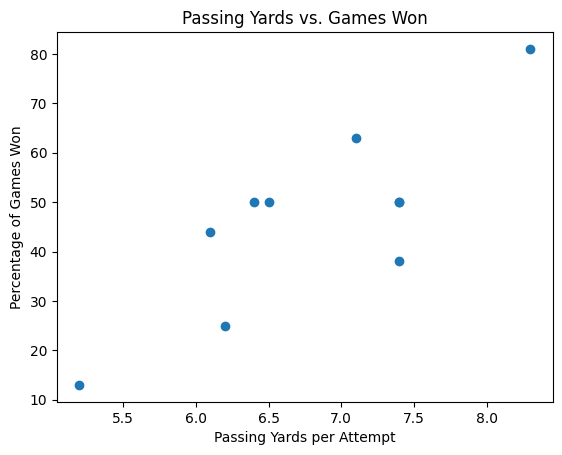

In [14]:
# Develop a scatter diagram with the number of passing yards per attempt on the
# horizontal axis and the percentage of games won on the vertical axis.

import matplotlib.pyplot as plt

plt.scatter(df['Yds'], df['Win'])
plt.xlabel('Passing Yards per Attempt')
plt.ylabel('Percentage of Games Won')
plt.title('Passing Yards vs. Games Won')
plt.show()


**2. What does the scatter diagram developed in part (a) indicate about the relationship between the two variables?**

In [15]:
# Display a summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    10 non-null     object 
 1   Yds     10 non-null     float64
 2   Win     10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


**Develop the estimated regression equation that could be used to predict the percentage of games won given the average number of passing yards per attempt**.

In [16]:
# Perform a linear regression with Win and Yds

import statsmodels.formula.api as sm

# Perform linear regression
result = sm.ols('Win ~ Yds', data=df).fit()

# Print the regression summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    Win   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 07 Aug 2024   Prob (F-statistic):            0.00440
Time:                        14:43:39   Log-Likelihood:                -37.627
No. Observations:                  10   AIC:                             79.25
Df Residuals:                       8   BIC:                             79.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.3910     30.001     -2.346      0.0

In [17]:
# Create a vector of predicted values

# Get the predicted values
predicted_values = result.predict()

# Print the predicted values
print(predicted_values)


[41.24745763 51.55254237 56.70508475 39.5299435  56.70508475 72.16271186
 56.70508475 34.37740113 18.91977401 36.09491525]


In [18]:
# Create a vector of residual values

# Get the residuals
residuals = result.resid

# Print the residuals
print(residuals)


0     8.752542
1    11.447458
2   -18.705085
3    10.470056
4    -6.705085
5     8.837288
6    -6.705085
7     9.622599
8    -5.919774
9   -11.094915
dtype: float64


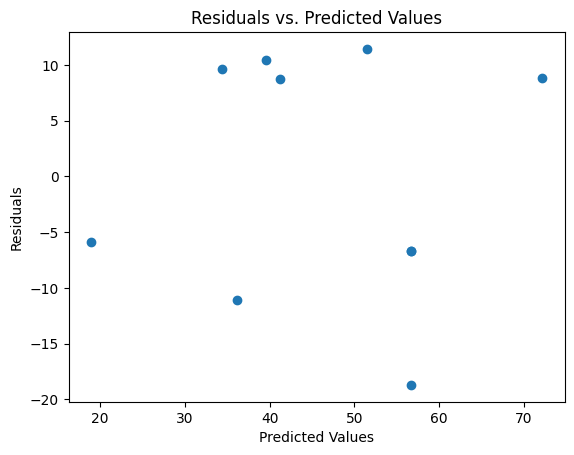

In [19]:
# Plot residuals against predicted values

import matplotlib.pyplot as plt

# Plot residuals against predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


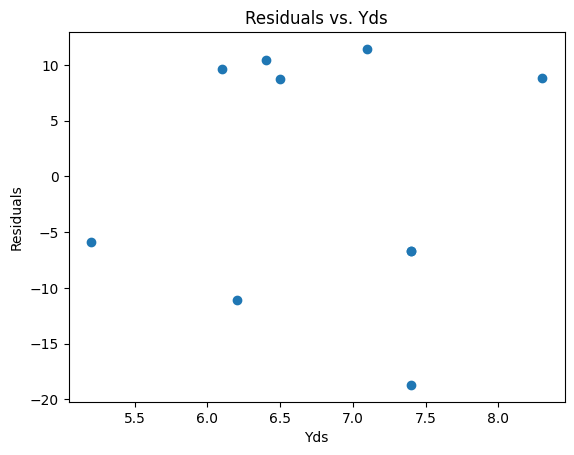

In [21]:
# Plot residuals vs. Yds

# Plot residuals against Yds
plt.scatter(df['Yds'], residuals)
plt.xlabel('Yds')
plt.ylabel('Residuals')
plt.title('Residuals vs. Yds')
plt.show()


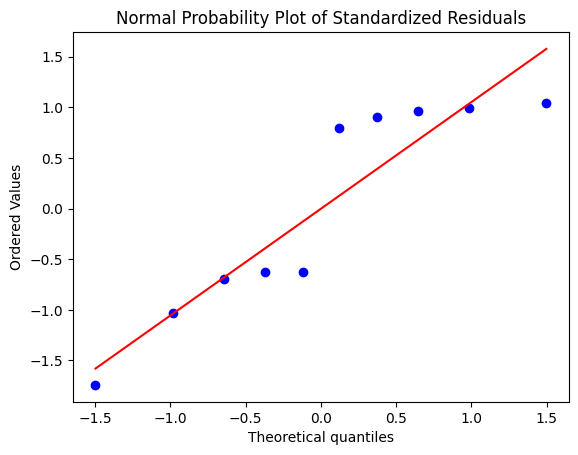

In [22]:
# Produce a normal probability plot of standardized residuals

import scipy.stats as stats

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

# Create a normal probability plot
stats.probplot(standardized_residuals, plot=plt)
plt.title('Normal Probability Plot of Standardized Residuals')
plt.show()


In [23]:
# Create a list of standardize residuals

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

#create a list of standardize residuals
standardized_residuals_list = standardized_residuals.tolist()
print(standardized_residuals_list)


[0.7975380218905928, 1.0431006583751132, -1.7422735162464593, 0.9593994000137813, -0.6245409596113651, 0.9941024917220007, -0.6245409596113651, 0.9061414831837469, -0.6924602092682164, -1.033428999397368]


In [24]:
# Calculate the hat values

# Calculate hat values
influence = result.get_influence()
hat_values = influence.hat_matrix_diag

# Print hat values
print(hat_values)


[0.11271186 0.11271186 0.15084746 0.12259887 0.15084746 0.41779661
 0.15084746 0.16920904 0.46158192 0.15084746]


In [25]:
# Calculate the Cook's D Statistics

# Calculate Cook's D statistics
cooks_d = influence.cooks_distance[0]

# Print Cook's D statistics
print(cooks_d)


[0.04039966 0.06910785 0.26962177 0.06430684 0.03464528 0.35458676
 0.03464528 0.08361685 0.20553643 0.0948601 ]


In [26]:
# Create a new data frame to predict the Population of 14

# Create a new DataFrame for prediction
new_data = pd.DataFrame({'Yds': [6.2]})

# Predict win for the new data
predicted_win = result.predict(new_data)

# Calculate the 95% confidence interval for the prediction
prediction_interval = result.get_prediction(new_data).summary_frame(alpha=0.05)

# Print the predicted sales
print(predicted_win, prediction_interval)


0    36.094915
dtype: float64         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  36.094915  4.525009      25.660225      46.529606      7.273225   

   obs_ci_upper  
0     64.916606  
